# **Setting**

In [ ]:
! pip install koreanize-matplotlib

In [ ]:
# system
import os
import warnings
warnings.filterwarnings('ignore')                       # warning 출력 false

# dataframe
import pickle
import numpy as np
import pandas as pd

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# import koreanize_matplotlib
import seaborn as sns
from PIL import Image

# sklearn
from sklearn.model_selection import train_test_split

# **1. CNN 이해하기**

## ***핵심 Point***
1. 이미지에서 특징(features)을 추출. 변형이 있어도 동일하게 추출하기 때문에 좋은 성능을 낼 수 있다.
2. 보다 적은 특징(features)을 가지고 분류를 할 수 있다.

## ***구조***
인공 신경망 구조 +
1. Convolution Layer
2. Pooling Layer





## ***연산***
1. Filter<br>
Filter를 통해 특징을 추출 뒤로 계속 쌓는다. -> size 축소<br>
보통 홀수를 사용
2. Padding<br>
size 축소를 방지하기 위해 Padding(테두리에 셀 추가) -> 일반적으로 0으로 채움(Zero Padding)
3. Stride<br>
Filter를 슬라이딩 할 때 몇 칸씩 움직일래? -> 많이 움직일수록 size 축소
4. Pooling(=subsampling)<br>
입력된 데이터를 압축. ex. Max Pooling -> 가장 큰 값으로 압축


## ***! Note***

* Tensorflow는 따로 입력하지 않아도 계산해주지만 Pytorch는 따로 입력해주어야 한다.<br>
연산이 어떻게 이루어지는지 정확히 이해하고 있어야 할 수 있다.

# **2. CNN 실습하기**

## **1) 데이터 불러오기**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f'X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, X_train={y_test.shape}')

4422102/4422102 [==============================] - 0s 0us/step
X_train=(60000, 28, 28), y_train=(60000,), X_test=(10000, 28, 28), X_train=(10000,)


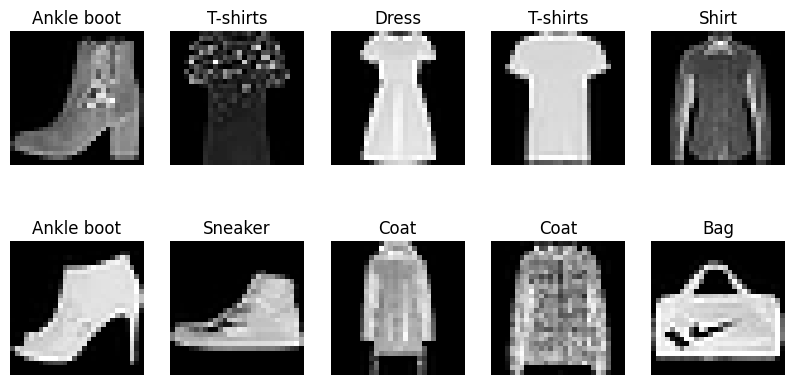

In [ ]:
# 데이터 그리기
np.random.seed(100)
random_idx = np.random.randint(60000, size=10)

class_names = ['T-shirts','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fig = plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_idx):
    ax = plt.subplot(2, 5, i+1)

    ax.imshow(X_train[idx], cmap='gray')
    ax.set(title=class_names[y_train[idx]])
    ax.axis('off')

## **2) 데이터 전처리**

In [ ]:
X_train = np.reshape(X_train/255, (-1, 28, 28, 1))          # 배열을 4차원으로 변경(batch, width, height, channel)
X_test = np.reshape(X_test/255, (-1, 28, 28, 1))            # 배열을 4차원으로 변경(batch, width, height, channel)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

print(f'X_train={X_train.shape}\tX_val={X_val.shape}\ty_train={y_train.shape}\ty_val={y_val.shape}')

X_train=(42000, 28, 28, 1)	X_val=(18000, 28, 28, 1)	y_train=(42000, 10)	y_val=(18000, 10)


## **3) 모델 설정**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [ ]:
from keras.layers import MaxPool2D
model = Sequential(
    [
        Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)),
        MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
        Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
        MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
        Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
        MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

In [ ]:
# 모델 환경 설정하기(loss, optimizer, metrics 설정)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## **4) 모델 학습 및 성능 평가**

In [ ]:
from keras.callbacks import EarlyStopping

# 학습 중단 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
model_fit = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30,batch_size=128,callbacks=[early_stopping])

Epoch 1/30
329/329 [==============================] - 4s 7ms/step - loss: 0.6772 - accuracy: 0.7580 - val_loss: 0.4372 - val_accuracy: 0.8457
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4071 - accuracy: 0.8534 - val_loss: 0.3978 - val_accuracy: 0.8559
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3502 - accuracy: 0.8737 - val_loss: 0.3579 - val_accuracy: 0.8697
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3124 - accuracy: 0.8886 - val_loss: 0.3407 - val_accuracy: 0.8775
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.2908 - accuracy: 0.8937 - val_loss: 0.2883 - val_accuracy: 0.8964
Epoch 6/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2689 - accuracy: 0.9029 - val_loss: 0.3017 - val_accuracy: 0.8886
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2542 - accuracy: 0.9076 - val_loss: 0.2883 - val_accuracy: 0.8960
Epoch 

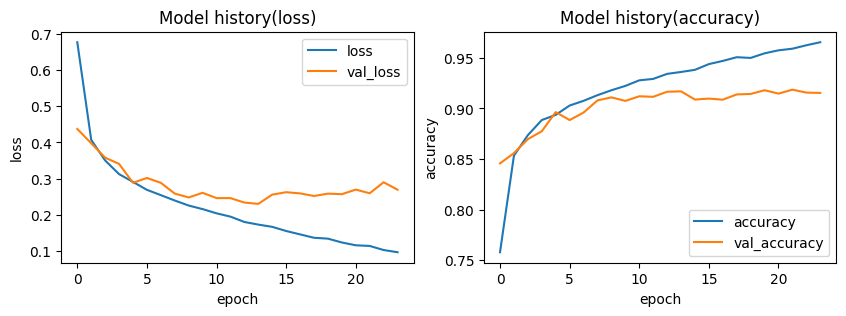

In [ ]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model_fit.history
names = ['loss', 'accuracy']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()


In [ ]:
# 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.9056
Test accuracy: 0.9056000113487244


## **5) 예측하기**

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_test_n = y_test.argmax(axis=1)
y_pred_n = y_pred.argmax(axis=1)

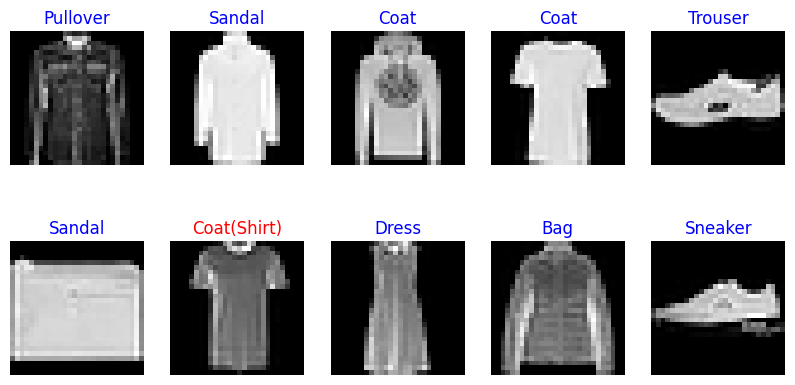

In [ ]:
# 데이터 그리기
np.random.seed(100)
random_idx = np.random.randint(10000, size=10)

class_names = ['T-shirts','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fig = plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_idx):
    if y_test_n[idx] == y_pred_n[idx]:
        color = 'blue'
        title = f'{class_names[y_test_n[idx]]}'
    else:
        color = 'red'
        title = f'{class_names[y_pred_n[idx]]}({class_names[y_test_n[idx]]})'

    ax = plt.subplot(2, 5, i+1)

    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(title, color=color)
    ax.axis('off')

# **3. 모델 비교하기**

## ***핵심 Point***
* 같은 layer를 쌓아도 Dense로만 쌓는 것보다 parameter의 수가 더 적다.
* 즉, 메모리 용량도 덜 차지하고, 적은 parameter로도 성능을 높인다는 것에 CNN의 우수함을 볼 수 있다.

In [ ]:
model_dense = Sequential()
model_dense.add(Dense(128,activation='relu',input_shape=(784,)))

model_dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_conv2d = Sequential()
model_conv2d.add(Conv2D(1000,kernel_size=3,activation='relu',input_shape=(28,28,1)))

model_conv2d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 1000)      10000     
                                                                 
Total params: 10,000
Trainable params: 10,000
Non-trainable params: 0
_________________________________________________________________


# **4. LeNet(1998) 구현하기**

[[참고자료] Organize everything I know](https://oi.readthedocs.io/en/latest/computer_vision/cnn/lenet.html)

## ***Layer 이해하기***
* 대표적인 32 x 32 image data = CIFAR10(자동차, 새, 개구리 등)


### **Layer 1**
* 32 x 32 image 입력
* Filter 5 x 5, 6개 사용
* strides = 1

⟹ parameter 수 : (5 x 5) x 6 + 6(bias) = 156    
⟹ output size : 움직인 횟수 (32 - 5)/1  + 1= 28 ⟶ 28 x 28 x 6

### **Layer 2**
* 28 x 28 x 6 입력
* pooling size 2 x 2, Average Pooling 사용
* strides = 2

⟹ parameter 수 : (coefficient + bias) x 6 = 12      
⟹ output size : 28/2 = 14 ⟶ 14 x 14 x 6

### **Layer 3**
* 14 x 14 x 6 입력
* Filter 5 x 5, 16개 **But** 선택적으로 10개 연결
* strides = 1

⟹ parameter 수 : ((5 x 5) x 10) x 6 + 16(bias) = 1516      
⟹ output size : 움직인 횟수 (14 - 5)/1 + 1= 10 ⟶ 10 x 10 x 16

### **Layer 4**
* 10 x 10 x 16 입력
* pooling size 2 x 2, Average Pooling 사용
* strides = 2

⟹ parameter 수 : (coefficient + bias) x 16 = 32     
⟹ output size : 10/2 = 5 ⟶ 5 x 5 x 16

### **Layer 5**
* 5 x 5 x 6 입력
* Filter 5 x 5, 120개
* strides = 1

⟹ parameter 수 : ((5 x 5) x 120) * 16 + 120(bias) = 48120     
⟹ output size : 움직인 횟수 (5 - 5)/1 + 1 = 1 ⟶ 1 x 1 x 120

### **Layer 6**
* 1 x 1 x 120
* Layer 84, activation = tanh

⟹ parameter 수 : 120 x 84 + 84(bias) = 10164            
⟹ output size : 1 x 1 x 84

### **Layer 7**
* 1 x 1 x 10
* Layer 10, activation = softmax

⟹ parameter 수 : 84 x 10 + 10(bias) = 850      
⟹ output size : 1 x 1 x 10

## **최종**
* Number of parameters = 156 + 12 + 1516 + 32 + 48120 + 10164 + 850 = 60850




## **모델 구현하기**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D

In [ ]:
model_lenet5 = Sequential(
    [
        Conv2D(filters=6,kernel_size=5,strides=1,activation='tanh',input_shape=(32,32,1)),
        AvgPool2D(pool_size=(2,2),strides=2),
        Conv2D(filters=16,kernel_size=5,strides=1,activation='tanh'),
        AvgPool2D(pool_size=(2,2),strides=2),
        Conv2D(filters=120,kernel_size=5,strides=1,activation='tanh'),
        Flatten(),
        Dense(84, activation='tanh'),
        Dense(10, activation='softmax')
    ]
)

model_lenet5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_10 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_11 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_39 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_7 (Flatten)         (None, 120)             

In [ ]:
156 + 2416 + 48120 + 10164 + 850

61706

# **보충 자료**

## **`tf.gather()`**
* 여러 위치에서 요소들을 가지고 오고 싶을 때 사용한다.
* `axis=-1`이면 마지막 차원을 의미한다.
* ex. 0, 2, 4번째 위치의 요소들만 출력해줘

In [ ]:
# gather 예제
ex_tensor = tf.constant([[1,2],[3,4],[5,6],[7,8],[9,10]])
indices = [0, 2, 4]

gathered_tensor = tf.gather(ex_tensor, indices)

print(gathered_tensor)

tf.Tensor(
[[ 1  2]
 [ 5  6]
 [ 9 10]], shape=(3, 2), dtype=int32)


## **`keras.layers.Lambda()`**
* tensorflow 전용 함수를 만든다고 생각하자.
* ex. 첫번째 요소만 제곱한 후 출력해줘

In [ ]:
from tensorflow.keras.layers import Lambda

# lambda 예제
ex_tensor = tf.constant([[1,2],[3,4],[5,6],[7,8],[9,10]])

lambda_func = Lambda(lambda x: tf.square(x[0]))

lambda_tensor = lambda_func(ex_tensor)

print(lambda_tensor)

tf.Tensor([1 4], shape=(2,), dtype=int32)
